# importing libraries

In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans
import pylab as pl

In [2]:
df_travel = pd.read_csv(r'C:\Users\makay\Documents\Data Immersion 6\6.1 assignment.csv',index_col = False)

In [3]:
#Checking for duplicates 
dups = df_travel.duplicated()

In [4]:
dups.shape

(137,)

In [5]:
#Checking for missing values
df_travel.isnull().sum()

Trip ID                 0
Destination             0
Start date              0
End date                0
Duration (days)         0
Traveler name           0
Traveler age            0
Traveler gender         0
Traveler nationality    0
Accommodation type      0
Accommodation cost      0
Transportation type     1
Transportation cost     1
dtype: int64

In [6]:
df_travel['Transportation cost'] = df_travel['Transportation cost'].fillna(0)

In [7]:
df_travel['Accommodation cost'] = df_travel['Accommodation cost'].fillna(0)

In [8]:
df_travel['Transportation cost'].isnull().sum()

0

In [9]:
df_travel['Accommodation cost'].isnull().sum()

0

In [10]:
df_travel.head()

,Trip ID,Destination,Start date,End date,Duration (days),Traveler name,Traveler age,Traveler gender,Traveler nationality,Accommodation type,Accommodation cost,Transportation type,Transportation cost
0,1,England,5/1/2023,5/8/2023,7,John Smith,35,Male,American,Hotel,1200,Flight,600.0
1,2,Thailand,6/15/2023,6/20/2023,5,Jane Doe,28,Female,Canadian,Resort,800,Flight,500.0
2,3,Indonesia,7/1/2023,7/8/2023,7,David Lee,45,Male,Korean,Villa,1000,Flight,700.0
3,4,United States of America,8/15/2023,8/29/2023,14,Sarah Johnson,29,Female,British,Hotel,2000,Flight,1000.0
4,5,Japan,9/10/2023,9/17/2023,7,Kim Nguyen,26,Female,Vietnamese,Airbnb,700,Train,200.0


In [11]:
#Removing categorical columns
df_travel.drop(columns=["Destination","Start date","End date", "Traveler name","Traveler gender","Traveler nationality","Accommodation type","Transportation type"], inplace = True)

In [12]:
num_cl = range(1, 10) 
kmeans = [KMeans(n_clusters=i) for i in num_cl]

In [13]:
score = [kmeans[i].fit(df_travel).score(df_travel) for i in range(len(kmeans))]
score

C:\Users\makay\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[-289995205.7518248,
 -72310054.9360465,
 -43312672.723809525,
 -32655866.575314153,
 -26506247.905677646,
 -20865125.2073723,
 -15180029.314560443,
 -12246134.06277924,
 -10817849.968819875]

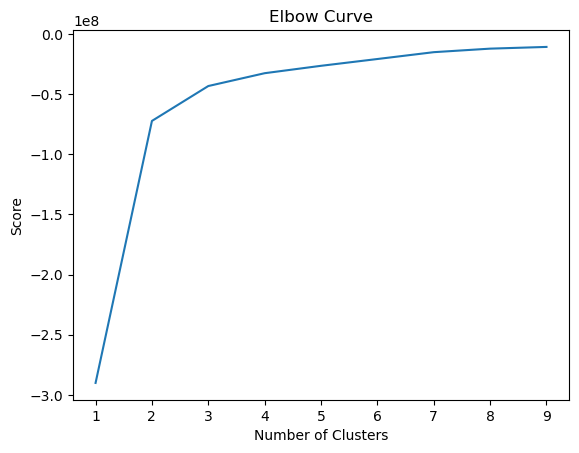

In [14]:
#Plot the elbow curve using PyLab.
pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

The Jump happens from about 2 to 3 and then somewhat flattens out with a slight upward grade. Clusters of 3 would be optimal because that is when the chart starts to flatten. 

# k-means

In [15]:
#creating object
kmeans = KMeans(n_clusters = 3)

In [16]:
#fit object into data
kmeans.fit(df_travel)

KMeans(n_clusters=3)

In [18]:
df_travel['clusters'] = kmeans.fit_predict(df_travel)

In [19]:
df_travel.head()

,Trip ID,Duration (days),Traveler age,Accommodation cost,Transportation cost,clusters
0,1,7,35,1200,600.0,1
1,2,5,28,800,500.0,1
2,3,7,45,1000,700.0,1
3,4,14,29,2000,1000.0,2
4,5,7,26,700,200.0,1


In [20]:
#checking number of observations
df_travel['clusters'].value_counts()

1    115
2     15
0      7
Name: clusters, dtype: int64

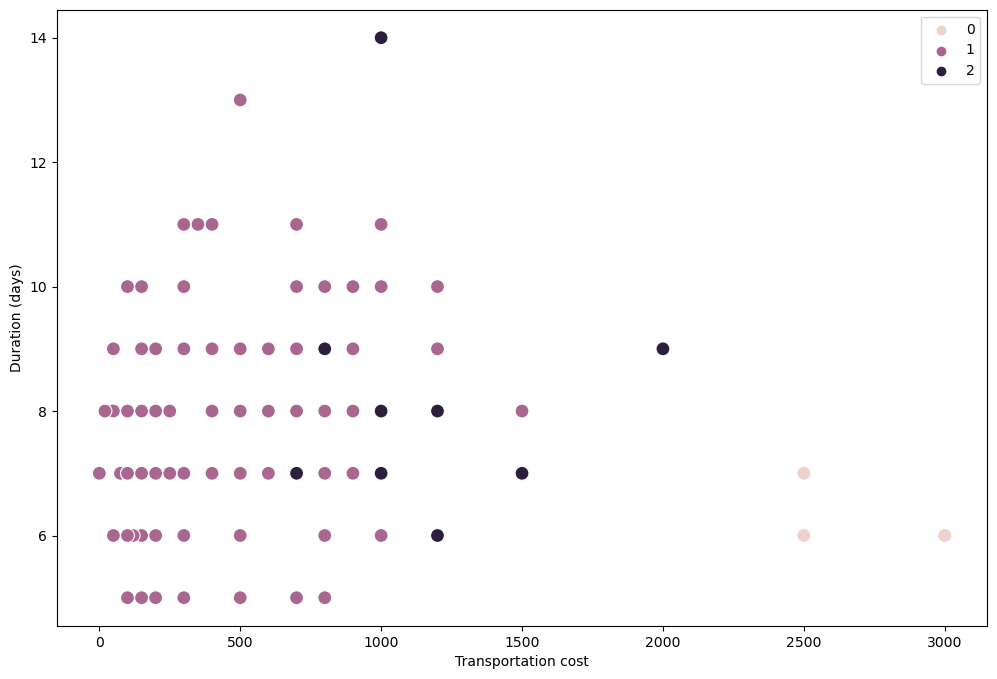

In [24]:
# Plot the clusters for the "Transportation cost" and "Duration (days)" variables.
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_travel['Transportation cost'], y=df_travel['Duration (days)'], hue=kmeans.labels_, s=100) 
ax.grid(False)
plt.xlabel('Transportation cost')
plt.ylabel('Duration (days)') 
plt.show()

Majority of the data is a cluster 1 with the outliers being a cluster 0

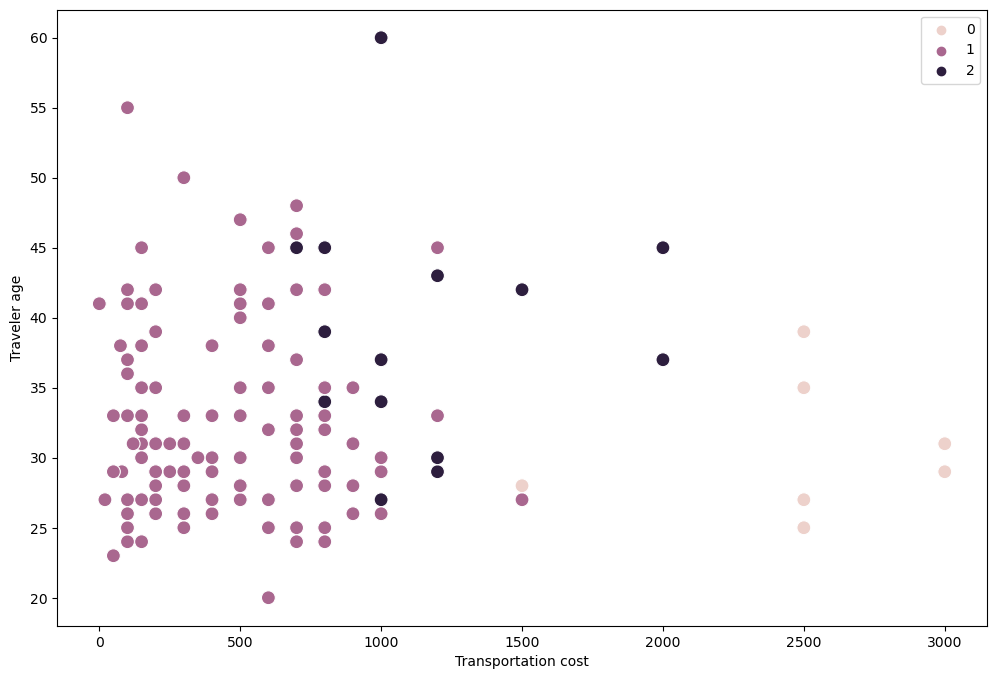

In [25]:
# Plot the clusters for the "Transportation cost" and "Traveler age" variables.
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_travel['Transportation cost'], y=df_travel['Traveler age'], hue=kmeans.labels_, s=100) 
ax.grid(False)
plt.xlabel('Transportation cost')
plt.ylabel('Traveler age') 
plt.show()

Majority of young travelers who spend $1000 or less on transportation are a cluster 1 

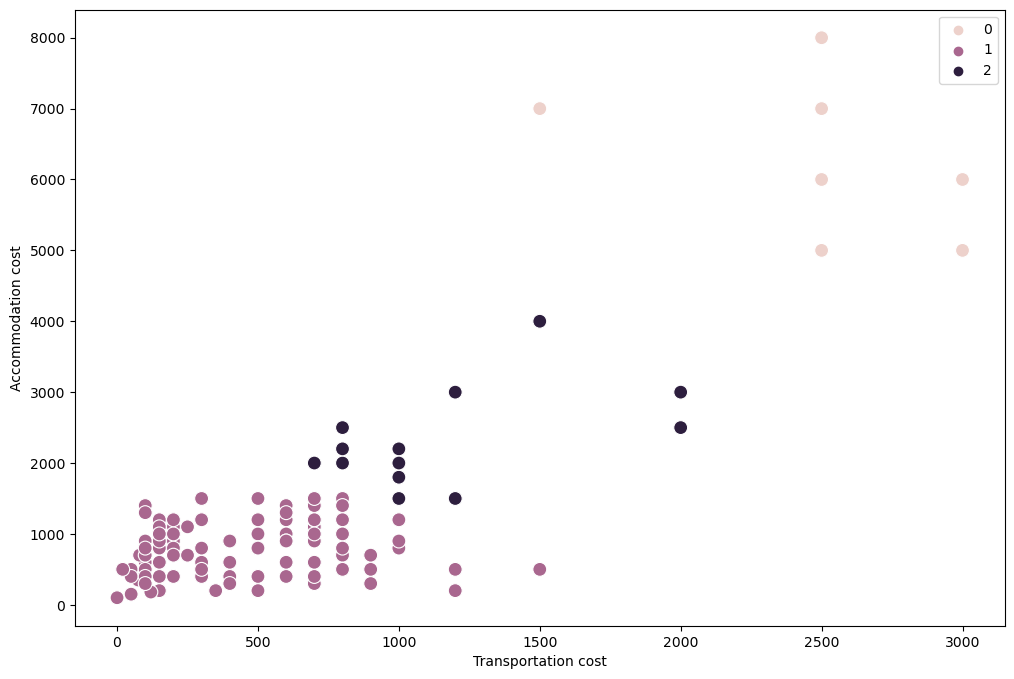

In [27]:
# Plot the clusters for the "Transportation cost" and "Accommodation cost" variables.
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_travel['Transportation cost'], y=df_travel['Accommodation cost'], hue=kmeans.labels_, s=100) 
ax.grid(False)
plt.xlabel('Transportation cost')
plt.ylabel('Accommodation cost') 
plt.show()

as transportation and accommodation cost increase the clusters go from 1 to 2 to 0

In [28]:
#using loc function to check clusters
df_travel.loc[df_travel['clusters'] == 2, 'cluster'] = 'dark purple'
df_travel.loc[df_travel['clusters'] == 1, 'cluster'] = 'purple'
df_travel.loc[df_travel['clusters'] == 0, 'cluster'] = 'pink'

In [29]:
df_travel.groupby('cluster').agg({'Duration (days)':['mean', 'median'], 
                         'Traveler age':['mean', 'median'], 
                         'Transportation cost':['mean', 'median'],
                          'Accommodation cost':['mean', 'median']})

Duration (days)        Traveler age        Transportation cost  \
                       mean median         mean median                mean   
cluster                                                                      
dark purple        8.000000    7.0    38.400000   37.0         1146.666667   
pink               6.571429    7.0    30.571429   29.0         2500.000000   
purple             7.617391    7.0    32.652174   31.0          461.260870   

                    Accommodation cost          
             median               mean  median  
cluster                                         
dark purple  1000.0        2246.666667  2000.0  
pink         2500.0        6285.714286  6000.0  
purple        400.0         807.652174   800.0

for duration all categories are medianed at being a 7 each clusters is slightly above or below it. Categories duration and traveler age have highest dark purple with purple followed by pink. And then categories transportation and accommodation